In [150]:
server=TRUE
if (server){
dataPath='/home/khrovatin/timeTrajectoriesNet/data/counts/'
dataPathNormalised='/home/khrovatin/timeTrajectoriesNet/data/RPKUM/'
dataPathCode='/home/khrovatin/git/baylor-dicty/R/'
path_save_disag='/home/khrovatin/timeTrajectoriesNet/data/stages/disagg/deSeq/'
    }else{
dataPath='/home/karin/Documents/timeTrajectories/data/countsRaw/combined/'
dataPathNormalised='/home/karin/Documents/timeTrajectories/data/RPKUM/combined/'
dataPathCode='/home/karin/Documents/git/baylor-dicty/R/'
  
}

In [151]:
library("DESeq2")
library('dplyr')
source(paste(dataPathCode,'libraryDE.R',sep=''))

library("BiocParallel")
register(MulticoreParam(20))


In [152]:
#Load data counts
genes<-read.table(paste(dataPath,"mergedGenes_counts.tsv",sep=''), header=TRUE,row.names=1, sep="\t")
conditions<-read.table(paste(dataPathNormalised,"conditions_mergedGenes.tsv",sep=''), header=TRUE,row.names='Measurment', sep="\t")
#R imported colnames of genes with changes but gene IDs remained ok
rownames(conditions)<-make.names(rownames(conditions))

#Stages are already ordered
STAGES<-c('no_agg','stream','lag','tag','tip','slug','mhat','cul','FB','yem')
PHENOTYPES_ORDERED=c('no_agg', 'stream', 'lag', 'tag', 'tip', 'slug', 'mhat', 'cul', 'FB','yem')
PHENOTYPES_X=data.frame(Phenotype=PHENOTYPES_ORDERED,X=c(1:length(PHENOTYPES_ORDERED)))

## OvR all or WT

In [10]:
#*** Find stage specific genes 1 vs all adjusting for replicates (Do in WT or all)
#Uses only replicates present in both stage and rest group
# For stage A use timepoints with phenotypes A and A/B for test and everything without A as control (B, B/C)


#Use replicate as confounder - if FALSE use all data (not only those reps that in stage of interest and in other)
adjust_rep=TRUE
#WT or all - also change the path for saving below
#conditions_test=conditions
conditions_test=conditions[conditions$Group=='WT',]
#path_save='/home/khrovatin/timeTrajectoriesNet/data/deTime/stage_vs_other/nobatchrep/'
path_save='/home/khrovatin/timeTrajectoriesNet/data/deTime/stage_vs_other/WT_batchrep/'

conditions_test=conditions_test[rowSums(conditions_test[, PHENOTYPES_ORDERED])>0, ]
for (stage in STAGES){
  print(stage)
  if (sum(conditions_test[stage])>0){
    test<-conditions_test[conditions_test[stage]==1,]
    #Select only measurments where 'stage' is the only phenotype e.g. test only A (not A/B)
    #single_stage1<-rowSums(test[,STAGES])==1
    #test<-test[single_stage1,]
    control<-conditions_test[conditions_test[stage]!=1,]
    if (adjust_rep){
      replicates<-intersect(control$Replicate,test$Replicate)
      print(paste('N rep',length(unique(replicates))))
      test<-test[test$Replicate %in% replicates,]
      control<-control[control$Replicate %in% replicates,]
    }
    test$Comparison<-rep(stage,dim(test)[1])
    control$Comparison<-rep('other',dim(control)[1])
    conditions_sub<-rbind(test,control)
    genes_sub<-genes[,rownames(conditions_sub)]
    design_formula=~Replicate+Comparison
    if (!adjust_rep) design_formula=~Comparison
    print(design_formula)
    print(dim(conditions_sub))
    res<-runDeSeq2(conditions_sub,genes_sub,case=stage,control='other',design=design_formula,main_lvl='Comparison',
                   padj=NULL, logFC=NULL,
                   path=path_save, save_dds_path=path_save)
  } 
} 


[1] "no_agg"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 160 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4126, 33%
LFC < 0 (down)     : 5007, 41%
outliers [1]       : 91, 0.74%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "stream"
[1] "N rep 8"
~Replicate + Comparison
[1] 60 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 157 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12325 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1740, 14%
LFC < 0 (down)     : 3765, 31%
outliers [1]       : 144, 1.2%
low counts [2]     : 239, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "lag"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 131 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1898, 15%
LFC < 0 (down)     : 4166, 34%
outliers [1]       : 127, 1%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tag"
[1] "N rep 7"
~Replicate + Comparison
[1] 57 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 162 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12300 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 626, 5.1%
LFC < 0 (down)     : 1925, 16%
outliers [1]       : 150, 1.2%
low counts [2]     : 477, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tip"
[1] "N rep 4"
~Replicate + Comparison
[1] 35 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 336 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12277 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 617, 5%
LFC < 0 (down)     : 1694, 14%
outliers [1]       : 262, 2.1%
low counts [2]     : 1190, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "slug"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 136 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2404, 19%
LFC < 0 (down)     : 3577, 29%
outliers [1]       : 122, 0.99%
low counts [2]     : 479, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "mhat"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 198 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3176, 26%
LFC < 0 (down)     : 3948, 32%
outliers [1]       : 185, 1.5%
low counts [2]     : 240, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "cul"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 147 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3983, 32%
LFC < 0 (down)     : 4394, 36%
outliers [1]       : 125, 1%
low counts [2]     : 479, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "FB"
[1] "N rep 9"
~Replicate + Comparison
[1] 70 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers

-- replacing outliers and refitting for 329 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2366, 19%
LFC < 0 (down)     : 3551, 29%
outliers [1]       : 307, 2.5%
low counts [2]     : 240, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "yem"


## OvR individual strains

In [11]:
#TODO
#The code for individual strains -combining pvals got deleated. See explanations for how it was done. 
#Also the library with R functions needs to be changed to test for lFC>0.5.

In [13]:
na.omit(a)

,a,b
,<dbl>,<dbl>
1,1,1


## OvO neighbouring WT

In [6]:
#Use only WT or AX4 data
#conditions_test=conditions[conditions$Group=='WT',]
conditions_test=conditions[conditions$Strain=='AX4',]
if(server){
    path_save='/home/khrovatin/timeTrajectoriesNet/data/stages/neighbouring/AX4/keepNA/'
}else{
    path_save='/home/karin/Documents/timeTrajectories/data/deTime/neighbouring/AX4/keepNA/'
}

stages=STAGES[STAGES != "yem"]
for (idx in 1:(length(stages)-1)){
  stage1=stages[idx]
  stage2=stages[idx+1]
  print(paste(stage1,stage2))
  test<-conditions_test[conditions_test['main_stage']==stage2,]
  control<-conditions_test[conditions_test['main_stage']==stage1,]
  
  #At least 2 replicates are in control and test
    
  if (length(unique(test$Replicate))>1 & length(unique(control$Replicate))>1){
    
    conditions_sub<-rbind(test,control)
    genes_sub<-genes[,rownames(conditions_sub)]
    design_formula=~main_stage
    print(design_formula)
    print(dim(conditions_sub))
    #print(conditions_sub[,c('Replicate','main_stage')])
      
    res<-runDeSeq2(conditions_sub,genes_sub,case=stage2,control=stage1,design=design_formula,main_lvl='main_stage',
                   padj=NULL, logFC=NULL,
                   path=path_save, save_dds_path=path_save,removeNA=FALSE)
  }
}

[1] "no_agg stream"
~main_stage
[1] 17 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 89 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11939 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2618, 22%
LFC < 0 (down)     : 2667, 22%
outliers [1]       : 21, 0.18%
low counts [2]     : 462, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "stream lag"
~main_stage
[1] 11 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11893 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1344, 11%
LFC < 0 (down)     : 854, 7.2%
outliers [1]       : 62, 0.52%
low counts [2]     : 1153, 9.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "lag tag"
~main_stage
[1] 12 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 28 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11956 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1383, 12%
LFC < 0 (down)     : 785, 6.6%
outliers [1]       : 26, 0.22%
low counts [2]     : 1159, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tag tip"
~main_stage
[1] 11 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 38 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11986 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 586, 4.9%
LFC < 0 (down)     : 1102, 9.2%
outliers [1]       : 29, 0.24%
low counts [2]     : 930, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tip slug"
~main_stage
[1] 10 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12012 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 183, 1.5%
LFC < 0 (down)     : 67, 0.56%
outliers [1]       : 34, 0.28%
low counts [2]     : 2327, 19%
(mean count < 7)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "slug mhat"
~main_stage
[1] 11 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12067 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1864, 15%
LFC < 0 (down)     : 1261, 10%
outliers [1]       : 18, 0.15%
low counts [2]     : 1170, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "mhat cul"
~main_stage
[1] 11 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12051 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 455, 3.8%
LFC < 0 (down)     : 318, 2.6%
outliers [1]       : 34, 0.28%
low counts [2]     : 2101, 17%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "cul FB"
~main_stage
[1] 11 16


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12047 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 407, 3.4%
LFC < 0 (down)     : 358, 3%
outliers [1]       : 13, 0.11%
low counts [2]     : 1401, 12%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


## Disag between timepoints for specific timepoints of each replicate

In [6]:
# Comparisons to make, first element of comparison is reference samples, second case samples, third name,
# fourth ref name, and fifth case name.
# Samples are given as c(rep,time)

In [54]:
comparisons=list(
    list(list(c('tgrB1C1_r1',8),c('tgrB1C1_r2',8)), list(c('tgrB1C1_r1',14),c('tgrB1C1_r2',14)),
         'PCAtgrB1C1','agg','disag'),
    list(list(c('tgrB1_r1',6),c('tgrB1_r2',6)), list(c('tgrB1_r1',14),c('tgrB1_r2',14)),
         'PCAtgrB1','agg','disag'),
    # tgrC1 is not used here as it might be quite different based on other present stages
    list(list(c('tgrB1_r1',14),c('tgrB1_r2',12),c('tgrB1C1_r2',12)
     #,c('tgrC1_r2',20)
     ), 
     list(c('tgrB1_r1',16),c('tgrB1_r2',14),c('tgrB1C1_r2',14)
     #,c('tgrC1_r2',24)
     ),'lagTOstream','agg','disag'),
    list(list(c('tgrC1_r1',8),c('tgrC1_r1',12),c('gbfA_r1',14),c('gbfA_r2',16)), 
     list(c('tgrC1_r1',10),c('tgrC1_r1',14),c('gbfA_r1',16),c('gbfA_r2',20)),'streamTOnoagg','agg','disag')
    )

In [7]:
# Extract conditions rows for samples as specified above (e.g. list(c(rep,time),...))
addSamples<-function(dfConditions,listSamples){
    df<-data.frame()
    for(sample in listSamples){
        data<-dfConditions[dfConditions$Replicate==sample[1] & dfConditions$Time==sample[2],]
        df<-rbind(df,data)
    }
    return(df)
}

In [56]:
# DE analysis for specific samples, adjusting for replicates
for (comparison in comparisons){
    
    print(comparison[[3]])
    samples1<-addSamples(dfConditions=conditions,listSamples=comparison[[1]])['Replicate']
    samples1['Comparison']<-comparison[[4]]
    samples2<-addSamples(dfConditions=conditions,listSamples=comparison[[2]])['Replicate']
    samples2['Comparison']<-comparison[[5]]
    conditions_sub<-rbind(samples1,samples2)
    genes_sub<-genes[,rownames(conditions_sub)]
    design_formula=~Replicate+Comparison
    print(conditions_sub)
    print(dim(genes_sub))
    path_save_comparison=paste(path_save_disag,comparison[[3]],'_',sep='')
    res<-runDeSeq2(conditions_sub,genes_sub,case=comparison[[5]],control=comparison[[4]],
                   design=design_formula,main_lvl='Comparison',
                   padj=NULL, logFC=NULL,
                   path=path_save_comparison, save_dds_path=path_save_comparison)
  
} 

[1] "PCAtgrB1C1"
                                                                                Replicate
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1C1_r1_14h_7_S23_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_14h_7_S23_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                                                               Comparison
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        agg
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        agg
tgrB1C1_r1_14h_7_S23_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        dis
tgrB1C1_r2_14h_7_S23_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        dis
[1] 12828     4


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers




out of 11348 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1664, 15%
LFC < 0 (down)     : 1269, 11%
outliers [1]       : 0, 0%
low counts [2]     : 1320, 12%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "PCAtgrB1"
                                                                              Replicate
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
tgrB1_r1_14h_17_S33_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_14h_27_S43_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
                                                                              Comparison
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        agg
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_mil

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers




out of 11346 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2385, 21%
LFC < 0 (down)     : 2326, 21%
outliers [1]       : 0, 0%
low counts [2]     : 880, 7.8%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "lagTOstream"
                                                                                Replicate
tgrB1_r1_14h_17_S33_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_12h_26_S42_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r2_12h_6_S22_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1_r1_16h_18_S34_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_14h_27_S43_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r2_14h_7_S23_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                               

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers




out of 11588 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 53, 0.46%
LFC < 0 (down)     : 93, 0.8%
outliers [1]       : 0, 0%
low counts [2]     : 4044, 35%
(mean count < 59)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "streamTOnoagg"
                                                                              Replicate
tgrC1_r1_08h_24_S40_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1_r1
tgrC1_r1_12h_26_S42_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1_r1
gbfA_14h_r1_34_S85_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    gbfA_r1
gbfA_r3_16h_11_S136_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   gbfA_r2
tgrC1_r1_10h_25_S41_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1_r1
tgrC1_r1_14h_27_S43_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1_r1
gbfA_16h_r1_35_S86_L003_R1_001_mappedGene_expressions_All_m

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 10 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 10 workers




out of 11729 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


## DE between timepoints of a strain

In [132]:
for (strain in c('tgrB1','tgrB1C1','AX4','comH','tagB')){
    for (timepoints in list(c(4,6),c(6,8),c(8,12))){
    
        print(paste(strain,timepoints))
        name1<-paste('hr',timepoints[1],sep='')
        name2<-paste('hr',timepoints[2],sep='')
        samples1<-conditions[conditions$Strain==strain & conditions$Time==timepoints[1],c('Replicate','Time')]
        samples1['Comparison']<-name1
        samples2<-conditions[conditions$Strain==strain & conditions$Time==timepoints[2],c('Replicate','Time')]
        samples2['Comparison']<-name2
        # Keep only replicates in both groups (removes some AX4 replicates for some comparisons)
        replicates_both<-intersect(unique(samples1$Replicate),unique(samples2$Replicate))
        conditions_sub<-rbind(samples1,samples2)
        conditions_sub<-conditions_sub[conditions_sub$Replicate %in% replicates_both,]
        genes_sub<-genes[,rownames(conditions_sub)]
        design_formula=~Replicate+Comparison
        print(conditions_sub)
        print(dim(genes_sub))
        fdr_optim=0.01
        path_save_comparison=paste(path_save_disag,strain,'_confoundRep_FDRoptim',fdr_optim,'_',sep='')
        res<-runDeSeq2(conditions_sub,genes_sub,case=name2,control=name1,
                       design=design_formula,main_lvl='Comparison',
                       padj=NULL, logFC=NULL,
                       path=path_save_comparison, save_dds_path=path_save_comparison,alpha=fdr_optim)
        }
  
} 

[1] "tgrB1 4" "tgrB1 6"
                                                                              Replicate
tgrB1_r1_04h_12_S28_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_04h_22_S38_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
                                                                              Time
tgrB1_r1_04h_12_S28_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    4
tgrB1_r2_04h_22_S38_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    4
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    6
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    6
                                                                              Comparison
tgrB1_r1_04h_12_S28_L003_R1_001_

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11161 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1322, 12%
LFC < 0 (down)     : 996, 8.9%
outliers [1]       : 0, 0%
low counts [2]     : 2164, 19%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 6" "tgrB1 8"
                                                                              Replicate
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
                                                                              Time
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    6
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_mile

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11201 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 561, 5%
LFC < 0 (down)     : 543, 4.8%
outliers [1]       : 0, 0%
low counts [2]     : 2606, 23%
(mean count < 16)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 8"  "tgrB1 12"
                                                                              Replicate
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
tgrB1_r1_12h_16_S32_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r1
tgrB1_r2_12h_26_S42_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1_r2
                                                                              Time
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    8
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_mile

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11303 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 711, 6.3%
LFC < 0 (down)     : 373, 3.3%
outliers [1]       : 0, 0%
low counts [2]     : 1973, 17%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 4" "tgrB1C1 6"
                                                                                Replicate
tgrB1C1_r1_04h_2_S18_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_04h_2_S18_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                                                               Time
tgrB1C1_r1_04h_2_S18_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    4
tgrB1C1_r2_04h_2_S18_L002_R1_001_mappedGene_exp

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11441 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 777, 6.8%
LFC < 0 (down)     : 403, 3.5%
outliers [1]       : 0, 0%
low counts [2]     : 1775, 16%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 6" "tgrB1C1 8"
                                                                                Replicate
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                                                               Time
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    6
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expr

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11329 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 227, 2%
LFC < 0 (down)     : 177, 1.6%
outliers [1]       : 0, 0%
low counts [2]     : 2856, 25%
(mean count < 23)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 8"  "tgrB1C1 12"
                                                                                Replicate
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1C1_r1_12h_6_S22_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_12h_6_S22_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                                                               Time
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    8
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_exp

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11359 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 289, 2.5%
LFC < 0 (down)     : 91, 0.8%
outliers [1]       : 0, 0%
low counts [2]     : 2643, 23%
(mean count < 24)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "AX4 4" "AX4 6"
                                                                                Replicate
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff             AX4_FD_r1
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff             AX4_FD_r2
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff    AX4_SE_r5
pool27_AX4_bio1_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff    AX4_SE_r6
Pool28_AX4_bio2_hr04_5_17_AGGTACC_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r7
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff             AX4_FD_r1
FDpool02_CTCGATG_Hr06_mappedGene_expressions

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11856 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 958, 8.1%
LFC < 0 (down)     : 646, 5.4%
outliers [1]       : 0, 0%
low counts [2]     : 1839, 16%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "AX4 6" "AX4 8"
                                                                             Replicate
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff          AX4_FD_r1
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff          AX4_FD_r2
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r5
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r6
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r7
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff          AX4_FD_r1
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_g

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11844 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 476, 4%
LFC < 0 (down)     : 275, 2.3%
outliers [1]       : 0, 0%
low counts [2]     : 1608, 14%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "AX4 8"  "AX4 12"
                                                                             Replicate
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff          AX4_FD_r1
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff          AX4_FD_r2
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  AX4_PE_r3
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  AX4_PE_r4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r5
pool27_AX4_bio1_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff AX4_SE_r6
Pool29_AX4_bio2_hr08_2_CTCTGCA_mappedGene_expressions_All_milesto

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12006 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1847, 15%
LFC < 0 (down)     : 1550, 13%
outliers [1]       : 0, 0%
low counts [2]     : 1164, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 4" "comH 6"
                                                                              Replicate
t345_r1_04h_40_S113_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_04h_35_S155_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
t345_r1_06h_41_S114_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_06h_36_S156_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
                                                                              Time
t345_r1_04h_40_S113_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    4
t345_r2_04h_35_S155_L002_R1_001_mappedGene_expressions_All_milest

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11972 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 290, 2.4%
LFC < 0 (down)     : 191, 1.6%
outliers [1]       : 0, 0%
low counts [2]     : 2786, 23%
(mean count < 18)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 6" "comH 8"
                                                                              Replicate
t345_r1_06h_41_S114_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_06h_36_S156_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
t345_r1_08h_42_S115_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_08h_37_S157_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
                                                                              Time
t345_r1_06h_41_S114_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    6
t345_r2_06h_36_S156_L002_R1_001_mappedGene_expressions_All_milest

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12164 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 157, 1.3%
LFC < 0 (down)     : 51, 0.42%
outliers [1]       : 0, 0%
low counts [2]     : 3302, 27%
(mean count < 24)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 8"  "comH 12"
                                                                              Replicate
t345_r1_08h_42_S115_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_08h_37_S157_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
t345_r1_12h_28_S148_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r1
t345_r2_12h_38_S158_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH_r2
                                                                              Time
t345_r1_08h_42_S115_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    8
t345_r2_08h_37_S157_L002_R1_001_mappedGene_expressions_All_mile

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12191 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 466, 3.8%
LFC < 0 (down)     : 218, 1.8%
outliers [1]       : 0, 0%
low counts [2]     : 2128, 17%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 4" "tagB 6"
                                                                                Replicate
pool36_tagB__bio1_04h_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_04h_18_S153_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
pool36_tagB__bio1_06h_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_06h_20_S155_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
                                                                                Time
pool36_tagB__bio1_04h_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff      4
tagB_bio2_04h_18_S153_L008_R1_001_mappedGene_express

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11567 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 432, 3.7%
LFC < 0 (down)     : 429, 3.7%
outliers [1]       : 0, 0%
low counts [2]     : 2243, 19%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 6" "tagB 8"
                                                                                Replicate
pool36_tagB__bio1_06h_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_06h_20_S155_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
pool36_tagB__bio1_08h_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_08h_21_S156_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
                                                                                Time
pool36_tagB__bio1_06h_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff      6
tagB_bio2_06h_20_S155_L008_R1_001_mappedGene_express

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11552 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 886, 7.7%
LFC < 0 (down)     : 685, 5.9%
outliers [1]       : 0, 0%
low counts [2]     : 2016, 17%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 8"  "tagB 12"
                                                                                Replicate
pool36_tagB__bio1_08h_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_08h_21_S156_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
pool36_tagB__bio1_12h_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff     tagB_r1
tagB_bio2_12h_22_S157_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB_r2
                                                                                Time
pool36_tagB__bio1_08h_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff      8
tagB_bio2_08h_21_S156_L008_R1_001_mappedGene_expre

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11601 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 406, 3.5%
LFC < 0 (down)     : 256, 2.2%
outliers [1]       : 0, 0%
low counts [2]     : 2474, 21%
(mean count < 15)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


In [133]:
# Same as above but for strain group
for (group in c('tag_dis')){
    for (timepoints in list(c(4,6),c(6,8),c(8,12))){
    
        print(paste(group,timepoints))
        name1<-paste('hr',timepoints[1],sep='')
        name2<-paste('hr',timepoints[2],sep='')
        samples1<-conditions[conditions$Group==group & conditions$Time==timepoints[1],c('Replicate','Time')]
        samples1['Comparison']<-name1
        samples2<-conditions[conditions$Group==group & conditions$Time==timepoints[2],c('Replicate','Time')]
        samples2['Comparison']<-name2
        # Keep only replicates in both groups (removes some AX4 replicates for some comparisons)
        replicates_both<-intersect(unique(samples1$Replicate),unique(samples2$Replicate))
        conditions_sub<-rbind(samples1,samples2)
        conditions_sub<-conditions_sub[conditions_sub$Replicate %in% replicates_both,]
        genes_sub<-genes[,rownames(conditions_sub)]
        design_formula=~Replicate+Comparison
        print(conditions_sub)
        print(dim(genes_sub))
        fdr_optim=0.01
        path_save_comparison=paste(path_save_disag,group,'_confoundRep_FDRoptim',fdr_optim,'_',sep='')
        res<-runDeSeq2(conditions_sub,genes_sub,case=name2,control=name1,
                       design=design_formula,main_lvl='Comparison',
                       padj=NULL, logFC=NULL,
                       path=path_save_comparison, save_dds_path=path_save_comparison,alpha=fdr_optim)
        }
  
} 

[1] "tag_dis 4" "tag_dis 6"
                                                                                Replicate
tgrB1_r1_04h_12_S28_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_04h_22_S38_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_04h_2_S18_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_04h_2_S18_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
                                                                               Time
tgrB1_r1_04h_12_S28_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff 

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11609 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1873, 16%
LFC < 0 (down)     : 1510, 13%
outliers [1]       : 0, 0%
low counts [2]     : 1351, 12%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tag_dis 6" "tag_dis 8"
                                                                                Replicate
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_08h_4_S20_L003_R1_001_map

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11543 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 674, 5.8%
LFC < 0 (down)     : 650, 5.6%
outliers [1]       : 0, 0%
low counts [2]     : 1567, 14%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tag_dis 8"  "tag_dis 12"
                                                                                Replicate
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r1
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1_r2
tgrB1_r1_12h_16_S32_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r1
tgrB1_r2_12h_26_S42_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1_r2
tgrB1C1_r1_12h_6_S22_L003_R1_001_m

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11619 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1014, 8.7%
LFC < 0 (down)     : 521, 4.5%
outliers [1]       : 0, 0%
low counts [2]     : 1577, 14%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


## AX4 vs strain at timepoint

In [50]:
for (strain in c('tagB','comH','tgrB1','tgrB1C1','tgrC1','gbfA')){
    for (timepoint in c(4,6,8,12)){
    
        print(paste(strain,timepoint))
        # The column Time is added just because the DESeq2 wrapper parsing function does 
        # not work on single column DFs
        samples1<-conditions[conditions$Strain==strain & conditions$Time==timepoint,c('Strain','Time')]
        samples2<-conditions[conditions$Strain=='AX4' & conditions$Time==timepoint,c('Strain','Time')]
        conditions_sub<-rbind(samples1,samples2)
        genes_sub<-genes[,rownames(conditions_sub)]
        design_formula=~Strain
        print(conditions_sub)
        print(dim(genes_sub))
        path_save_comparison=paste(path_save_disag,'hr',timepoint,'_',sep='')
        res<-runDeSeq2(conditions_sub,genes_sub,case=strain,control='AX4',
                       design=design_formula,main_lvl='Strain',
                       padj=NULL, logFC=NULL,
                       path=path_save_comparison, save_dds_path=path_save_comparison)
        }
  
} 

[1] "tagB 4"
                                                                                Strain
pool36_tagB__bio1_04h_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff     tagB
tagB_bio2_04h_18_S153_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff       AX4
pool27_AX4_bio1_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_gff       AX4
Pool28_AX4_bio2_hr04_5_17_AGGTACC_mappedGene_expressions_All_milestone_mRNA_gff    AX4
                                                                                Time
pool36_tagB__bio1_04h_5_GCAAGAT_

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 92 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11798 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 9, 0.076%
LFC < 0 (down)     : 85, 0.72%
outliers [1]       : 0, 0%
low counts [2]     : 1830, 16%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 6"
                                                                                Strain
pool36_tagB__bio1_06h_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     tagB
tagB_bio2_06h_20_S155_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff       AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff       AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11782 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 45, 0.38%
LFC < 0 (down)     : 372, 3.2%
outliers [1]       : 52, 0.44%
low counts [2]     : 1371, 12%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 8"
                                                                                Strain
pool36_tagB__bio1_08h_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     tagB
tagB_bio2_08h_21_S156_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_m

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 37 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11808 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 29, 0.25%
LFC < 0 (down)     : 159, 1.3%
outliers [1]       : 0, 0%
low counts [2]     : 2061, 17%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tagB 12"
                                                                                Strain
pool36_tagB__bio1_12h_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff     tagB
tagB_bio2_12h_22_S157_L008_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   tagB
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 66 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11970 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 913, 7.6%
LFC < 0 (down)     : 1643, 14%
outliers [1]       : 0, 0%
low counts [2]     : 697, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 4"
                                                                                Strain
t345_r1_04h_40_S113_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     comH
t345_r2_04h_35_S155_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     comH
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 136 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11771 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 183, 1.6%
LFC < 0 (down)     : 350, 3%
outliers [1]       : 0, 0%
low counts [2]     : 1370, 12%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 6"
                                                                              Strain
t345_r1_06h_41_S114_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
t345_r2_06h_36_S156_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
    

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 12062 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 94, 0.78%
LFC < 0 (down)     : 143, 1.2%
outliers [1]       : 53, 0.44%
low counts [2]     : 1637, 14%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 8"
                                                                              Strain
t345_r1_08h_42_S115_L001_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
t345_r2_08h_37_S157_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     AX

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 110 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12155 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 306, 2.5%
LFC < 0 (down)     : 498, 4.1%
outliers [1]       : 0, 0%
low counts [2]     : 942, 7.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "comH 12"
                                                                              Strain
t345_r1_12h_28_S148_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
t345_r2_12h_38_S158_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   comH
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff     AX4
p

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 65 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12202 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 448, 3.7%
LFC < 0 (down)     : 721, 5.9%
outliers [1]       : 0, 0%
low counts [2]     : 1183, 9.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 4"
                                                                                Strain
tgrB1_r1_04h_12_S28_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1
tgrB1_r2_04h_22_S38_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrB1
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRN

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 80 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11692 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 14, 0.12%
LFC < 0 (down)     : 53, 0.45%
outliers [1]       : 0, 0%
low counts [2]     : 2040, 17%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 6"
                                                                              Strain
tgrB1_r1_06h_13_S29_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
tgrB1_r2_06h_23_S39_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
 

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11705 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 76, 0.65%
LFC < 0 (down)     : 231, 2%
outliers [1]       : 56, 0.48%
low counts [2]     : 1135, 9.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 8"
                                                                              Strain
tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     AX

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 34 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11748 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 791, 6.7%
LFC < 0 (down)     : 1100, 9.4%
outliers [1]       : 0, 0%
low counts [2]     : 911, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 12"
                                                                              Strain
tgrB1_r1_12h_16_S32_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
tgrB1_r2_12h_26_S42_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff     AX4

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 116 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11931 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1970, 17%
LFC < 0 (down)     : 2358, 20%
outliers [1]       : 0, 0%
low counts [2]     : 694, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 4"
                                                                                 Strain
tgrB1C1_r1_04h_2_S18_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1C1
tgrB1C1_r2_04h_2_S18_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrB1C1
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                 AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                 AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff         AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff         AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_miles

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 93 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11762 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 51, 0.43%
LFC < 0 (down)     : 124, 1.1%
outliers [1]       : 0, 0%
low counts [2]     : 1369, 12%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 6"
                                                                                Strain
tgrB1C1_r1_06h_3_S19_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
tgrB1C1_r2_06h_3_S19_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff       AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff       AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mR

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11739 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 63, 0.54%
LFC < 0 (down)     : 168, 1.4%
outliers [1]       : 51, 0.43%
low counts [2]     : 683, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 8"
                                                                                Strain
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_mileston

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 33 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11776 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 494, 4.2%
LFC < 0 (down)     : 783, 6.6%
outliers [1]       : 0, 0%
low counts [2]     : 914, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 12"
                                                                                Strain
tgrB1C1_r1_12h_6_S22_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
tgrB1C1_r2_12h_6_S22_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff tgrB1C1
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_m

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 64 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11954 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1852, 15%
LFC < 0 (down)     : 2351, 20%
outliers [1]       : 0, 0%
low counts [2]     : 696, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrC1 4"
                                                                                Strain
tgrC1_r1_04h_22_S38_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrC1
tgrC1_r2_04h_12_S28_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    tgrC1
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 82 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11739 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 282, 2.4%
LFC < 0 (down)     : 1093, 9.3%
outliers [1]       : 0, 0%
low counts [2]     : 2276, 19%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrC1 6"
                                                                              Strain
tgrC1_r1_06h_23_S39_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
tgrC1_r2_06h_13_S29_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff     AX4


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11751 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 883, 7.5%
LFC < 0 (down)     : 1778, 15%
outliers [1]       : 56, 0.48%
low counts [2]     : 684, 5.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrC1 8"
                                                                              Strain
tgrC1_r1_08h_24_S40_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
tgrC1_r2_08h_14_S30_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff     A

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 71 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11780 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1747, 15%
LFC < 0 (down)     : 2415, 21%
outliers [1]       : 0, 0%
low counts [2]     : 914, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrC1 12"
                                                                              Strain
tgrC1_r1_12h_26_S42_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
tgrC1_r2_12h_16_S32_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff  tgrC1
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff              AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff     AX4


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 75 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11950 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1380, 12%
LFC < 0 (down)     : 2121, 18%
outliers [1]       : 0, 0%
low counts [2]     : 464, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "gbfA 4"
                                                                                Strain
gbfA_4h_r1_29_S80_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff       gbfA
gbfA_r3_04h_2_S127_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff      gbfA
FDpool01_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
FDpool02_GCAAGAT_Hr04_mappedGene_expressions_All_milestone_mRNA_gff                AX4
Ax4_r1_04h_10_S87_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Ax4_r2_04h_10_S59_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff        AX4
Pool26_AX4_bio2_hr04_5_GCAAGAT_mappedGene_expressions_All_milestone_mRNA_

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 85 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11718 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 117, 1%
LFC < 0 (down)     : 379, 3.2%
outliers [1]       : 0, 0%
low counts [2]     : 2045, 17%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "gbfA 6"
                                                                             Strain
gbfA_6h_r1_30_S81_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    gbfA
gbfA_r3_06h_3_S128_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   gbfA
FDpool01_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff             AX4
FDpool02_CTCGATG_Hr06_mappedGene_expressions_All_milestone_mRNA_gff             AX4
Pool26_AX4_bio2_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff    AX4
pool27_AX4_bio1_hr06_7_CTCGATG_mappedGene_expressions_All_milestone_mRNA_gff    AX4
Pool29_AX4_bio2_hr06_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff    AX4
            

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11714 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 198, 1.7%
LFC < 0 (down)     : 856, 7.3%
outliers [1]       : 55, 0.47%
low counts [2]     : 909, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "gbfA 8"
                                                                             Strain
gbfA_8h_r1_31_S82_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff    gbfA
gbfA_r3_08h_4_S129_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   gbfA
FDpool01_CCGGTAC_Hr08_mappedGene_expressions_All_milestone_mRNA_gff             AX4
FDpool02_ACCAACT_Hr08_mappedGene_expressions_All_milestone_mRNA_gff             AX4
Ax4_r1_08h_11_S88_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Ax4_r2_08h_11_S60_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Pool26_AX4_bio2_hr08_8_GCTCGAA_mappedGene_expressions_All_milestone_mRNA_gff    AX4
pool27

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11785 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1056, 9%
LFC < 0 (down)     : 1733, 15%
outliers [1]       : 0, 0%
low counts [2]     : 914, 7.8%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "gbfA 12"
                                                                             Strain
gbfA_12h_r1_33_S84_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   gbfA
gbfA_r3_12h_6_S131_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff   gbfA
FDpool01_CAATATG_Hr12_mappedGene_expressions_All_milestone_mRNA_gff             AX4
FDpool02_ACTATCA_Hr12_mappedGene_expressions_All_milestone_mRNA_gff             AX4
Ax4_r1_12h_12_S89_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Ax4_r2_12h_12_S61_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff     AX4
Pool26_AX4_bio2_hr12_9_ACCAACT_mappedGene_expressions_All_milestone_mRNA_gff    AX4
pool27_AX4

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 67 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 11954 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2149, 18%
LFC < 0 (down)     : 2725, 23%
outliers [1]       : 0, 0%
low counts [2]     : 232, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


## tag_dis timepoint vs AX4 any

In [89]:
comparisons<-list('tgrB1'=c(6,8,10,12),'tgrB1C1'=c(6,8,10,12))
for (strain in names(comparisons)){
    for (timepoint in comparisons[[strain]]){
        print(paste(strain,timepoint))
        
        # The column Time is added just because the DESeq2 wrapper parsing function does 
        # not work on single column DFs
        name1<-paste(strain,'hr',timepoint,sep='')
        name2<-"AX4all"
        samples1<-conditions[conditions$Strain==strain & conditions$Time==timepoint,c('Strain','Time')]
        samples2<-conditions[conditions$Strain=='AX4' ,c('Strain','Time')]
        samples1['Comparison']<-name1
        samples2['Comparison']<-name2
        conditions_sub<-rbind(samples1,samples2)
        genes_sub<-genes[,rownames(conditions_sub)]
        design_formula=~Comparison
        #print(conditions_sub)
        print(dim(genes_sub))
        alternative='greater' #OR greaterAbs
        fdr_optim=0.05 #Deafult 0.1
        path_save_comparison=paste(path_save_disag,'disagVSAX4all_alternative',alternative,
                           '_FDRoptim',fdr_optim,'_',sep='')
        res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
                       design=design_formula,main_lvl='Comparison',
                       padj=NULL, logFC=NULL,
                       path=path_save_comparison, save_dds_path=path_save_comparison,
              altHypothesis=alternative,alpha=fdr_optim)

    }
}

[1] "tgrB1 6"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 360 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12331 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 17, 0.14%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 718, 5.8%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 8"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 365 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12329 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 7, 0.057%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 10"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 367 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12333 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 56, 0.45%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 718, 5.8%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1 12"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 367 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12330 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 128, 1%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 240, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 6"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 363 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12335 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 3, 0.024%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 8"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 367 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12332 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 10"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 369 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12332 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 23, 0.19%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "tgrB1C1 12"
[1] 12828    90


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 376 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12332 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 94, 0.76%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


In [145]:
# For tgrB1 and tgrB1C1 combined at individual timepoints
strains=c('tgrB1','tgrB1C1')
for (timepoint in c(6,8,10,12)){
        print(paste(timepoint))
        
        # The column Time is added just because the DESeq2 wrapper parsing function does 
        # not work on single column DFs
        time_str=paste0('hr',timepoint)
        name1<-paste(paste(strains,collapse=time_str),time_str,sep='')
        name2<-"AX4all"
        samples1<-conditions[conditions$Strain %in% strains & conditions$Time==timepoint,c('Strain','Time')]
        samples2<-conditions[conditions$Strain=='AX4' ,c('Strain','Time')]
        samples1['Comparison']<-name1
        samples2['Comparison']<-name2
        conditions_sub<-rbind(samples1,samples2)
        genes_sub<-genes[,rownames(conditions_sub)]
        design_formula=~Comparison
        #print(conditions_sub)
        print(dim(genes_sub))
        alternative='greater' #OR greaterAbs
        fdr_optim=0.01 #Deafult 0.1
        path_save_comparison=paste(path_save_disag,'disagVSAX4all_alternative',alternative,
                           '_FDRoptim',fdr_optim,'_',sep='')
        res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
                       design=design_formula,main_lvl='Comparison',
                       padj=NULL, logFC=NULL,
                       path=path_save_comparison, save_dds_path=path_save_comparison,
              altHypothesis=alternative,alpha=fdr_optim)

    }


[1] "6"
[1] 12828    92


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 350 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12338 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 48, 0.39%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 4, 0.032%
low counts [2]     : 1195, 9.7%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "8"
[1] 12828    92


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 349 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12334 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 71, 0.58%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 240, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "10"
[1] 12828    92


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 350 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12337 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 181, 1.5%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 4, 0.032%
low counts [2]     : 479, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "12"
[1] 12828    92


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 339 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12334 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 360, 2.9%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 4, 0.032%
low counts [2]     : 240, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


Potential disag genes based on known pattern (observed in some genes): tgrB1 8,10,12 and tgrB1C1 8,10,12 vs AX4 all. Or using other timepoints.

In [139]:
name1<-'tgrB1hr6hr8andtgrB1C1hr6hr8'
name2<-"AX4all"
samples1<-conditions[(conditions$Strain=='tgrB1' & conditions$Time %in% c(6,8))|
                     (conditions$Strain=='tgrB1C1' & conditions$Time %in% c(6,8)),c('Strain','Time')]
samples2<-conditions[conditions$Strain=='AX4' ,c('Strain','Time')]
samples1['Comparison']<-name1
samples2['Comparison']<-name2
conditions_sub<-rbind(samples1,samples2)
genes_sub<-genes[,rownames(conditions_sub)]
design_formula=~Comparison
#print(conditions_sub)
print(dim(genes_sub))
# Alternative hypothesis and FDR optimisation
alternative='greater' #OR greaterAbs
fdr_optim=0.01 #Deafult 0.1
#lfcThreshold=0
path_save_comparison=paste(path_save_disag,'disagVSAX4all_alternative',alternative,
                           #'lFCtest',lfcThreshold,
                           '_FDRoptim',fdr_optim,sep='')
res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
               design=design_formula,main_lvl='Comparison',
               padj=NULL, logFC=NULL,
               path=path_save_comparison, save_dds_path=path_save_comparison,
              altHypothesis=alternative,alpha=fdr_optim,
               #lfcThreshold=lfcThreshold
              )

[1] 12828    96


estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 338 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12343 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 431, 3.5%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 479, 3.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


### Test adjustment for confounders

In [74]:
dds<-readRDS(paste(path_save_comparison,'tgrB1hr8hr10hr12andtgrB1C1hr8hr10hr12_ref_AX4all.rds',sep=''))

In [ ]:
library("sva")

library("RUVSeq")

In [88]:
dat <- counts(dds, normalized = TRUE)
idx <- rowMeans(dat) > 1
dat <- dat[idx, ]
mod <- model.matrix(design_formula, colData(dds))
mod0 <- model.matrix(~ 1, colData(dds))
svseq <- svaseq(dat, mod, mod0, n.sv = 2)
rownames(svseq$sv)<-colnames(dds)
svseq$sv

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

tgrB1_r1_08h_14_S30_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0055173523,-0.055076940
tgrB1_r1_10h_15_S31_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0091597603,-0.019426790
tgrB1_r1_12h_16_S32_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0668451206,0.100330101
tgrB1_r2_08h_24_S40_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,-0.0168863596,-0.085440360
tgrB1_r2_10h_25_S41_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0027943698,-0.004412360
tgrB1_r2_12h_26_S42_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,-0.0005580779,-0.014020395
tgrB1C1_r1_08h_4_S20_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0057462684,-0.062230625
tgrB1C1_r1_10h_5_S21_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,-0.0092885116,-0.070676125
tgrB1C1_r1_12h_6_S22_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0268925935,0.055293331
tgrB1C1_r2_08h_4_S20_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0014850767,-0.058820659
tgrB1C1_r2_10h_5_S21_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,0.0072138857,-0.003480155


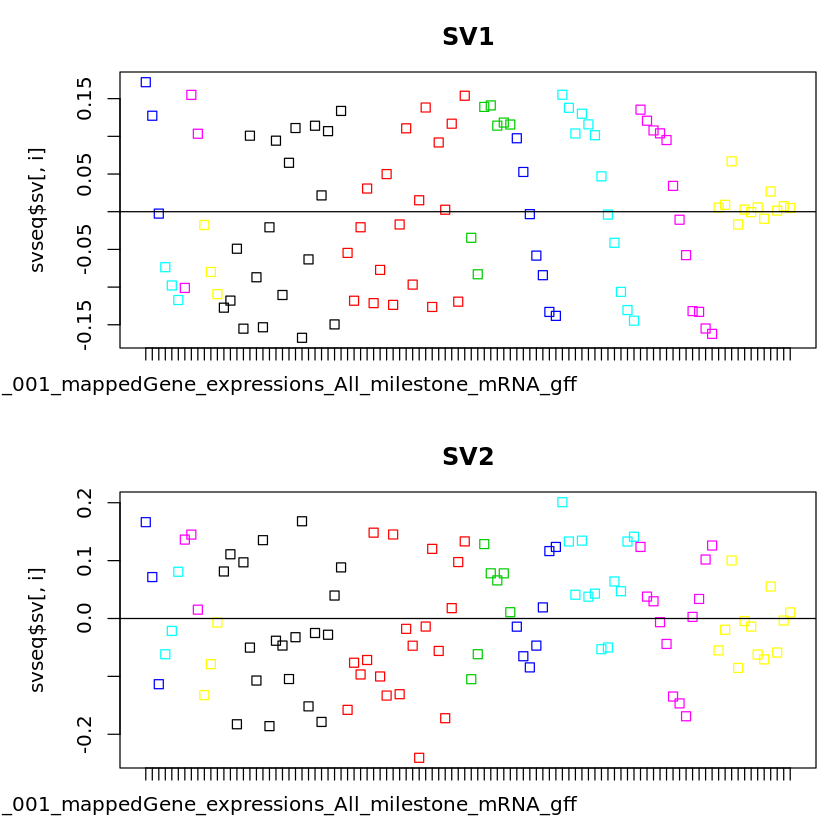

In [115]:
par(mfrow = c(2, 1), mar = c(3,5,3,1))
for (i in 1:2) {
stripchart(svseq$sv[, i] ~ colnames(dds), vertical = TRUE, main = paste0("SV", i), col=conditions[colnames(dds),'Replicate'])
abline(h = 0)
}

In [100]:
res<-read.table(paste(path_save_comparison,'DE_tgrB1hr8hr10hr12andtgrB1C1hr8hr10hr12_ref_AX4all_padj_lFC.tsv',sep=''),
                row.names=1,header=TRUE)

In [ ]:
set <- newSeqExpressionSet(counts(dds))
idx <- rowSums(counts(set) > 5) >= 2
set <- set[idx, ]
set <- betweenLaneNormalization(set, which="upper")
not.sig <- rownames(res)[which(res$pvalue > .1)]
empirical <- rownames(set)[ rownames(set) %in% not.sig ]
set <- RUVg(set, empirical, k=2)
pData(set)

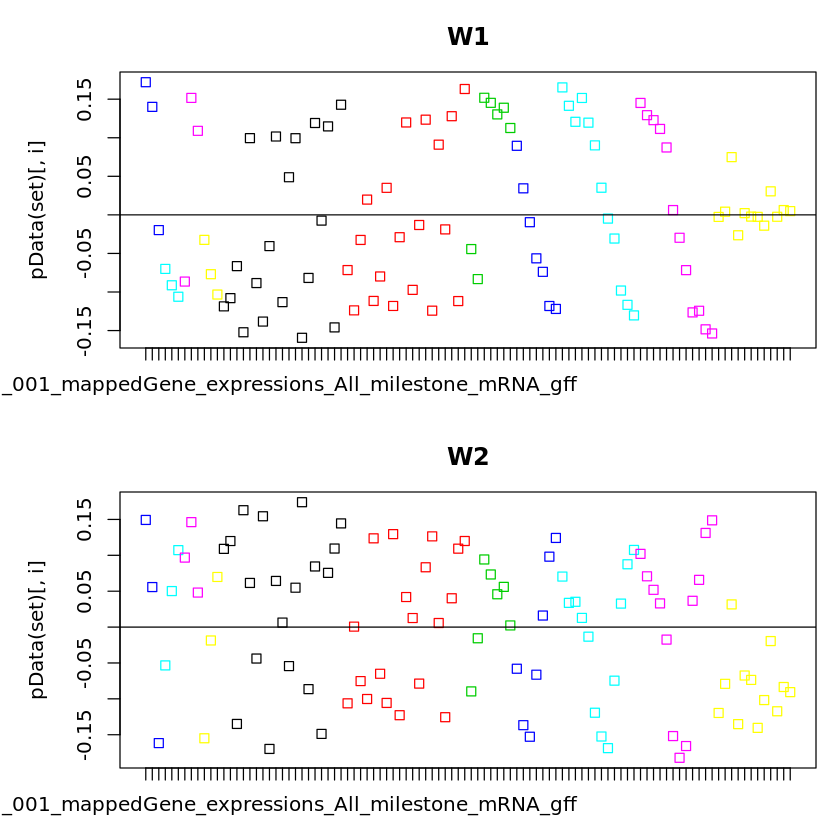

In [112]:
par(mfrow = c(2, 1), mar = c(3,5,3,1))
for (i in 1:2) {
stripchart(pData(set)[, i] ~ colnames(dds), vertical = TRUE, main = paste0("W",
i), col=conditions[colnames(dds),'Replicate'])
abline(h = 0)
}

## Media vs Buffer

In [153]:
library("readxl")

In [154]:
path_mb='/home/khrovatin/timeTrajectoriesNet/data/from_huston/'

In [155]:
path_mb='/home/khrovatin/timeTrajectoriesNet/data/from_huston/'
genes_b<-read_excel(paste0(path_mb,'Media_buff_hr0to6_r1r2_rc_nor.xlsx'), sheet = "buff_hr0to6_r1r2_rc")
genes_m<-read_excel(paste0(path_mb,'Media_buff_hr0to6_r1r2_rc_nor.xlsx'), sheet = "media_hr0to6_r1r2_rc")
genes_mb<-merge(genes_b,genes_m,by='ddb_g')

# Edit data
rownames(genes_mb)<-genes_mb$ddb_g
genes_mb<-genes_mb[,colnames(genes_mb)!='ddb_g']

if (!isTRUE(all(genes_mb == floor(genes_mb)))) stop("'genes_mb' must only contain integer values")

conditions_mb<-as.data.frame(t(data.frame(lapply(colnames(genes_mb),function(name){
    name_parts<-strsplit(name, split='_')[[1]]
    time=as.numeric(gsub('hr','',name_parts[2]))
    return(t(data.frame(Group=name_parts[1],Time=time,Replicate=name_parts[3],row.names=c(name))))
}))))

In [127]:
#write.table(genes_mb ,paste0(path_mb,'ReadCount_mediaBuffer.tsv'),sep='\t',col.names=NA)

In [156]:
path_save_mb=paste0(path_save_disag,'media_buffer/')

### Media timepoints(s) vs Buffer all

#### Media timepoint vs buffer all

In [94]:
for (timepoint in c(0.5,1,2)){
    print(paste('Time',timepoint))

    # The column Time is added just because the DESeq2 wrapper parsing function does 
    # not work on single column DFs
    name1<-paste('media',timepoint,'hr',sep='')
    name2<-"bufferAll"
    samples1<-conditions_mb[conditions_mb$Group=='media' & conditions_mb$Time==timepoint,c('Group','Time')]
    samples2<-conditions_mb[conditions_mb$Group=='buff' ,c('Group','Time')]
    samples1['Comparison']<-name1
    samples2['Comparison']<-name2
    conditions_sub<-rbind(samples1,samples2)
    genes_sub<-genes_mb[,rownames(conditions_sub)]
    design_formula=~Comparison
    #print(conditions_sub)
    print(dim(genes_sub))
    path_save_comparison=paste(path_save_mb,'mediaVSbufferAll_',sep='')
    res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
                   design=design_formula,main_lvl='Comparison',
                   padj=NULL, logFC=NULL,
                   path=path_save_comparison, save_dds_path=path_save_comparison)

}

[1] "Time 0.5"
[1] 12828    16


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 536 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12256 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1093, 8.9%
LFC < 0 (down)     : 1783, 15%
outliers [1]       : 0, 0%
low counts [2]     : 476, 3.9%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "Time 1"
[1] 12828    16


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 429 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12264 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1162, 9.5%
LFC < 0 (down)     : 2144, 17%
outliers [1]       : 0, 0%
low counts [2]     : 238, 1.9%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "Time 2"
[1] 12828    16


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 465 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12262 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2222, 18%
LFC < 0 (down)     : 2928, 24%
outliers [1]       : 0, 0%
low counts [2]     : 476, 3.9%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


#### Media timepoints vs buffer all

In [168]:
times=c(0.5,1,2)
name1<-paste0('media',paste(times,collapse='hr'),'hr')
name2<-"bufferAll"
samples1<-conditions_mb[(conditions_mb$Group=='media' & conditions_mb$Time %in% times),c('Group','Time')]
samples2<-conditions_mb[conditions_mb$Group=='buff' ,c('Group','Time')]
samples1['Comparison']<-name1
samples2['Comparison']<-name2
conditions_sub<-rbind(samples1,samples2)
genes_sub<-genes_mb[,rownames(conditions_sub)]
design_formula=~Comparison
#print(conditions_sub)
print(dim(genes_sub))
# Alternative hypothesis and FDR optimisation
alternative='greater' #OR greaterAbs
fdr_optim=0.01 #Deafult 0.1
#lfcThreshold=0
path_save_comparison=paste(path_save_mb,'mediaVSbufferAll_',
                           'alternative',alternative,
                           #'lFCtest',lfcThreshold,
                           '_FDRoptim',fdr_optim,'_',
                           sep='')
res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
               design=design_formula,main_lvl='Comparison',
               padj=NULL, logFC=NULL,
               path=path_save_comparison, save_dds_path=path_save_comparison,
              altHypothesis=alternative,alpha=fdr_optim
               #,lfcThreshold=lfcThreshold
              )

[1] 12828    20


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 233 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12288 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 1464, 12%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 111, 0.9%
low counts [2]     : 1664, 14%
(mean count < 7)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


In [171]:
path_save_comparison

[1] "/home/khrovatin/timeTrajectoriesNet/data/stages/disagg/deSeq/media_buffer/mediaVSbufferAll_alternativegreater_FDRoptim0.01_"

### Media vs buffer at timepoint(s)

#### Media vs buffer at timepoint

In [98]:
for (timepoint in c(2,3,4,6)){
    print(paste('Time',timepoint))

    # The column Time is added just because the DESeq2 wrapper parsing function does 
    # not work on single column DFs
    name1<-paste('media',timepoint,'hr',sep='')
    name2<-paste('buffer',timepoint,'hr',sep='')
    samples1<-conditions_mb[conditions_mb$Group=='media' & conditions_mb$Time==timepoint,c('Group','Time')]
    samples2<-conditions_mb[conditions_mb$Group=='buff' & conditions_mb$Time==timepoint,c('Group','Time')]
    samples1['Comparison']<-name1
    samples2['Comparison']<-name2
    conditions_sub<-rbind(samples1,samples2)
    genes_sub<-genes_mb[,rownames(conditions_sub)]
    design_formula=~Comparison
    #print(conditions_sub)
    print(dim(genes_sub))
    path_save_comparison=paste(path_save_mb,sep='')
    res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
                   design=design_formula,main_lvl='Comparison',
                   padj=NULL, logFC=NULL,
                   path=path_save_comparison, save_dds_path=path_save_comparison)

}

[1] "Time 2"
[1] 12828     4


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11883 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1527, 13%
LFC < 0 (down)     : 1901, 16%
outliers [1]       : 0, 0%
low counts [2]     : 1152, 9.7%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "Time 3"
[1] 12828     4


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11898 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2554, 21%
LFC < 0 (down)     : 2749, 23%
outliers [1]       : 0, 0%
low counts [2]     : 923, 7.8%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "Time 4"
[1] 12828     4


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11991 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2680, 22%
LFC < 0 (down)     : 3141, 26%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
[1] "Time 6"
[1] 12828     4


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers




out of 11998 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2974, 25%
LFC < 0 (down)     : 3575, 30%
outliers [1]       : 0, 0%
low counts [2]     : 233, 1.9%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


#### Media vs buffer by pooling timepoints

In [102]:
times=c(2,3,4,6)
name1<-paste0('media',paste(times,collapse="hr"),'hr')
name2<-paste0('buffer',paste(times,collapse="hr"),'hr')
samples1<-conditions_mb[(conditions_mb$Group=='media' & conditions_mb$Time %in% times), c('Group','Time')]
samples2<-conditions_mb[(conditions_mb$Group=='buff' & conditions_mb$Time %in% times), c('Group','Time')]
samples1['Comparison']<-name1
samples2['Comparison']<-name2
conditions_sub<-rbind(samples1,samples2)
genes_sub<-genes_mb[,rownames(conditions_sub)]
design_formula=~Comparison
#print(conditions_sub)
print(dim(genes_sub))
# Alternative hypothesis and FDR optimisation
#alternative='greaterAbs' #OR greaterAbs
#fdr_optim=0.1 #Deafult 0.1
#lfcThreshold=0
path_save_comparison=paste(path_save_mb,
                           #'alternative',alternative,'lFCtest',lfcThreshold,'_FDRoptim',fdr_optim,
                           sep='')
res<-runDeSeq2(conditions_sub,genes_sub,case=name1,control=name2,
               design=design_formula,main_lvl='Comparison',
               padj=NULL, logFC=NULL,
               path=path_save_comparison, save_dds_path=path_save_comparison,
              #altHypothesis=alternative,alpha=fdr_optim,lfcThreshold=lfcThreshold
              )

[1] 12828    16


converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 20 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 20 workers

-- replacing outliers and refitting for 55 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 12244 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4099, 33%
LFC < 0 (down)     : 4723, 39%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL
